In [1]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

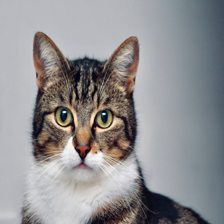

In [4]:
gold_fish = Image.open("cat.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.71764706, 0.71372549, 0.73333333],
         [0.70980392, 0.71372549, 0.73333333],
         [0.71764706, 0.71764706, 0.7372549 ],
         ...,
         [0.25882353, 0.30196078, 0.35294118],
         [0.25490196, 0.29019608, 0.3372549 ],
         [0.25490196, 0.30980392, 0.36470588]],

        [[0.72156863, 0.71764706, 0.7372549 ],
         [0.70588235, 0.71764706, 0.7372549 ],
         [0.70588235, 0.72156863, 0.7372549 ],
         ...,
         [0.25882353, 0.29803922, 0.35686275],
         [0.25882353, 0.28627451, 0.34901961],
         [0.25882353, 0.30196078, 0.36078431]],

        [[0.71372549, 0.72156863, 0.7372549 ],
         [0.70196078, 0.72156863, 0.74117647],
         [0.70588235, 0.71764706, 0.7372549 ],
         ...,
         [0.26666667, 0.30588235, 0.35294118],
         [0.25490196, 0.29411765, 0.34509804],
         [0.25098039, 0.29803922, 0.36078431]],

        ...,

        [[0.69019608, 0.69803922, 0.71764706],
         [0.6745098 , 0.69019608, 0.71764706]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

282

In [9]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'tabby'

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [12]:
data_dir

'.\\datasets\\flower_photos'

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [15]:
pip uninstall PIL

Note: you may need to restart the kernel to use updated packages.


In [16]:
PIL.Image.open(str(roses[1]))

NameError: name 'PIL' is not defined

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

In [ ]:
cv2.resize(img,(224,224)).shape

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)